In [129]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'
%matplotlib inline

In [2]:
import numpy as np
import pandas as  pd
import netCDF4

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import cmocean.cm as cmo

In [3]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1g2sEK9IocyMq-L9MbmbjrQzQ1XWWY9UV" -O 5_elev.nc

--2019-02-22 11:50:49--  https://drive.google.com/uc?export=download&id=1g2sEK9IocyMq-L9MbmbjrQzQ1XWWY9UV
Resolving drive.google.com (drive.google.com)... 216.58.200.238, 2404:6800:4008:802::200e
Connecting to drive.google.com (drive.google.com)|216.58.200.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a5rb91lpph18ssc92vvgi8f3amoaaidc/1550800800000/05668089712544318047/*/1g2sEK9IocyMq-L9MbmbjrQzQ1XWWY9UV?e=download [following]
--2019-02-22 11:50:49--  https://doc-00-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a5rb91lpph18ssc92vvgi8f3amoaaidc/1550800800000/05668089712544318047/*/1g2sEK9IocyMq-L9MbmbjrQzQ1XWWY9UV?e=download
Resolving doc-00-80-docs.googleusercontent.com (doc-00-80-docs.googleusercontent.com)... 172.217.160.65, 2404:6800:4012::2001
Connecting to doc-00-80-docs.googleusercontent.com (doc-00-80-docs.goog

In [4]:
data=netCDF4.Dataset('5_elev.nc')

In [5]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    dimensions(sizes): node(3573), nele(6234), nface(3), nv(33), one(1), sigma(26), nz(7), time(168)
    variables(dimensions): float32 time(time), int32 ele(nele,nface), float32 x(node), float32 y(node), float32 depth(node), float32 sigma(sigma), float32 sigma_h_c(one), float32 sigma_theta_b(one), float32 sigma_theta_f(one), float32 sigma_maxdepth(one), float32 Cs(sigma), float32 z(nz), float32 elev(time,node), int32 mesh()
    groups: 

In [138]:
elev=data['elev'][:]
elev.data[elev.data==1e+20]=np.nan

In [134]:
elev.shape

(168, 3573)

In [135]:
grid=pd.read_csv('hgrid.ll',header=None,skiprows=[0])
ne,nd=grid[0][0].split()
ne=int(ne)
nd=int(nd)

In [136]:
lon=[]
lat=[]
dep=[]
for i in range(nd):
    a,x,y,z=grid[0][i+1].split()
    lon.append(float(x))
    lat.append(float(y))
    dep.append(float(z))

In [137]:
ele=[]
for j in range(ne):
    a1=int(grid[0][j+i+2].split()[2])-1
    a2=int(grid[0][j+i+2].split()[3])-1
    a3=int(grid[0][j+i+2].split()[4])-1
    ele.append([a1,a2,a3])


In [141]:
maxlon=max(lon)
minlon=min(lon)
maxlat=max(lat)
minlat=min(lat)

In [149]:
m=Basemap(projection='merc',llcrnrlat=minlat,urcrnrlat=maxlat,\
            llcrnrlon=minlon,urcrnrlon=maxlon,resolution='h') #resolution='h'


In [143]:
lon=np.array(lon)
lat=np.array(lat)
xx,yy=m(lon,lat)


/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'tri'
  s)


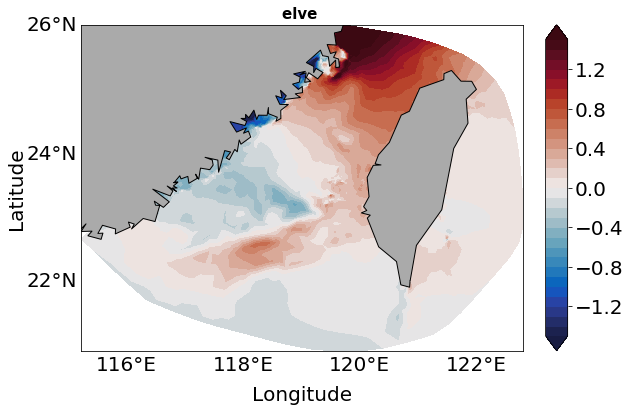

In [13]:
fig = plt.figure()
fig.set_size_inches(10, 6, forward=True)
cs=m.contourf(xx,yy,elev[1,:],np.linspace(-1.5,1.5,31,endpoint=True),tri = True,extend='both',cmap=cmo.balance)
#color bar  pad is distance in colobar to pic
cbar = m.colorbar(cs, location='right', pad="5%")
#set fontsize in color bar 
cbar.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.fillcontinents(color='#AAAAAA',lake_color='aqua')
#make ylabel
m.drawparallels(np.arange(18,30,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
m.drawmeridians(np.arange(110,130,2),labels=[0,0,0,1],fontsize=20, linewidth=0.0)
#title
plt.title('elve '  ,fontsize=15,weight='bold')         
plt.xlabel('Longitude',fontsize=20, labelpad=35)
plt.ylabel('Latitude',fontsize=20,  labelpad=55)
fig.savefig('elev.png')

In [14]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    dimensions(sizes): node(3573), nele(6234), nface(3), nv(33), one(1), sigma(26), nz(7), time(168)
    variables(dimensions): float32 time(time), int32 ele(nele,nface), float32 x(node), float32 y(node), float32 depth(node), float32 sigma(sigma), float32 sigma_h_c(one), float32 sigma_theta_b(one), float32 sigma_theta_f(one), float32 sigma_maxdepth(one), float32 Cs(sigma), float32 z(nz), float32 elev(time,node), int32 mesh()
    groups: 

In [130]:
x = np.asarray(data['x'][:].data)
y = np.asarray(data['y'][:].data)
triangles = np.asarray(data['ele'][:].data)-1

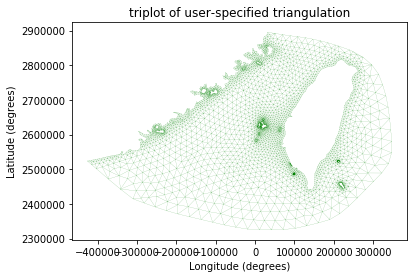

In [131]:
#plt.figure()
#plt.gca().set_aspect('equal')
plt.triplot(x, y, triangles, 'g-', lw=0.1)
plt.title('triplot of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()